In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2
from PIL import Image

from statistics import median
from statistics import mean
from statistics import mode
from statistics import quantiles
from statistics import pstdev
from statistics import pvariance

import os
import shutil

In [11]:
cd ../../data

[Errno 2] No such file or directory: '../../data'
/Users/lise/memoire_tech/M2_HN/data


In [12]:
with open("textile_clean.csv") as csv :
    df_textile = pd.read_csv(csv, sep="\t")
print(df_textile)

              ID                                        description  \
0    ILCA_ASU001  Cuadro doméstico, de la región de Tinkipaya (P...   
1    ILCA_ASU002  Tapete doméstico, basado en un ponchito, de la...   
2    ILCA_ASU003  Lliclla etnográfica, de la región de Calcha (P...   
3    ILCA_ASU004  Tapete doméstico en base a una lliclla, de la ...   
4    ILCA_ASU005  Medio acso etnográfico, de la región Jalq'a (C...   
..           ...                                                ...   
691  ILCA_VAM024  Banda larga y ancha en faz de urdimbre elabora...   
692  ILCA_VAM025  Fragmento de textil compuesto por dos componen...   
693  ILCA_VAM026  Bolsa-chuspa en faz de trama, de forma cuadrad...   
694  ILCA_VAM027  Fragmento de panel, en faz de trama.\nConsiste...   
695  ILCA_VAM028  Bolsa-chuspa de forma rectangular larga, en fa...   

                                                 image  \
0    ['ASU001_IMG_0754.jpg', 'ASU001_IMG_0755.jpg',...   
1    ['ASU002_IMG_0761.jpg', 'A

In [13]:
#Au moment du téléchargement on a déjà distingué les images .jgp et .png donc photographies et représentations numériques.
df_ID = df_textile['ID']
pd.DataFrame(df_ID)
liste_image = []
liste_schema = []

for i in df_textile.index : 
    listei = []
    listes = []
    elt = df_textile['image'][i].replace("[", "").replace("]", "").replace("'", "").replace(" ", "").split(",")
    #print(elt)
    for image in elt : 
        if image.endswith(".jpg") == True : 
            listei.append(image)
        else : 
            listes.append(image)
    liste_image.append(listei)
    liste_schema.append(listes)

df_image =  pd.DataFrame(df_ID)

image = pd.Series(liste_image)
schema = pd.Series(liste_schema)

df_image['image'] = image
df_image['schema'] = schema

df_image

,ID,image,schema
0,ILCA_ASU001,"[ASU001_IMG_0754.jpg, ASU001_IMG_0755.jpg, ASU...",[ASU001_S1_0755.png]
1,ILCA_ASU002,"[ASU002_IMG_0761.jpg, ASU002_IMG_0763.jpg, ASU...",[ASU002_S1_0767.png]
2,ILCA_ASU003,"[ASU003_IMG_0770.jpg, ASU003_IMG_0773.jpg, ASU...","[ASU003_S1_0775.png, ASU003_S1_0776.png]"
3,ILCA_ASU004,"[ASU004_IMG_0777.jpg, ASU004_IMG_0779.jpg, ASU...","[ASU004_S1_0779.png, ASU004_S1_0781.png]"
4,ILCA_ASU005,"[ASU005_IMG_0789.jpg, ASU005_IMG_0791.jpg, ASU...",[ASU005_S1_0796.png]
...,...,...,...
691,ILCA_VAM024,"[VAM024_IMG_4724.jpg, VAM024_IMG_4726.jpg, VAM...",[VAM024_S1_4726.png]
692,ILCA_VAM025,"[VAM025_IMG_4731.jpg, VAM025_IMG_4732.jpg, VAM...",[VAM025_S1_4739.png]
693,ILCA_VAM026,"[VAM026_IMG_4746.jpg, VAM026_IMG_4748.jpg]",[]
694,ILCA_VAM027,"[VAM027_IMG_4749.jpg, VAM027_IMG_4750.jpg, VAM...",[]


### Cas des croquis dans les images jpg. 
Dans les photograpihque du British Museum : croquis ajoutés aux images (.jpg) et indiqués par "_a", "_b", "_c".
Donc besoin de parcourir les images et de déplacer celles qui finissent par ça ==> 83 cas

In [20]:
path = "images/images_jpg/"

dir_croquis = "images/croquis/"
os.makedirs(dir_croquis, exist_ok=True)

#Récupération des noms des croquis
liste_croquis = []
liste_image = []

for elt in df_image['image'] : 
    for image in elt : 
        if image.endswith("_a.jpg") or image.endswith("_b.jpg") or image.endswith("_c.jpg") or image.endswith("_d.jpg") == True : 
            liste_croquis.append(image)
            shutil.move(f'{path}{image}', dir_croquis) #Déplacement des croquis dans un autre dossier
            
            elt = [x for x in elt if x != f'{image}']
            
    liste_image.append(elt)

image = pd.Series(liste_image)    
df_image['image'] = image

df_image

Error: Destination path 'images/croquis/BML002_a.jpg' already exists

In [27]:
def mean_images (df) :
    # Calculer le nombre moyen d'image par pièces textiles / représentation en boîte à moustache

    ID = []
    for i in range(len(df)) : 
        ID.append((df.loc[i,"ID"]))

    nombre_image = []
    nombre_schema = []

    for i in range(len(df)) : 
        count_image = 0
        count_schema  = 0
        colonne_image = df.loc[i,"image"].split(',')
        for a in range(len(colonne_image)) :

            if "jpg" in colonne_image[a] : 
                count_image+=1
            else :
                count_schema = len(colonne_image)-count_image

        nombre_image.append(count_image)
        nombre_schema.append(count_schema)

    class_nb_image = []

    for i in set(nombre_image): 
        a = nombre_image.count(i)
        class_nb_image.append(a)

    #Représentation en _bar plot_
    fig, ax = plt.subplots(ncols=2, figsize=(9, 4))
    bar_container = ax[0].bar(list(set(nombre_image)), class_nb_image)
    ax[0].set(ylabel="Nombre de textiles ", xlabel="Nombre d'images disponibles par textile", ylim=(0, 160))
    ax[0].set_title("Répartition des textiles \n selon leur nombre d'images")

    #Représentation en boîte à moustache
    ax[1].boxplot(nombre_image)
    ax[1].set_title("Statistiques du nombre \n d'images par textile")
    
    ID = []
    for i in range(len(df_textile)) : 
        ID.append((df_textile.loc[i,"ID"]))

        nombre_image = []

        for i in range(len(df_textile)) : 
            count_image = 0
            colonne_image = df_textile.loc[i,"image"].split(',')
            for a in range(len(colonne_image)) :

                if "jpg" in colonne_image[a] : 
                    count_image+=1
                else :
                    pass

            nombre_image.append(count_image)

    #Impression des métriques
    print(f'Médiane : {median(nombre_image)} \nMoyenne : {mean(nombre_image)} \nMode : {mode(nombre_image)} \nÉcart-type : {pstdev(nombre_image)} \nVariance : {pvariance(nombre_image)}')

    plt.show()

Médiane : 4.0 
Moyenne : 4.866379310344827 
Mode : 3 
Écart-type : 3.2573024229436336 
Variance : 10.610019074514467


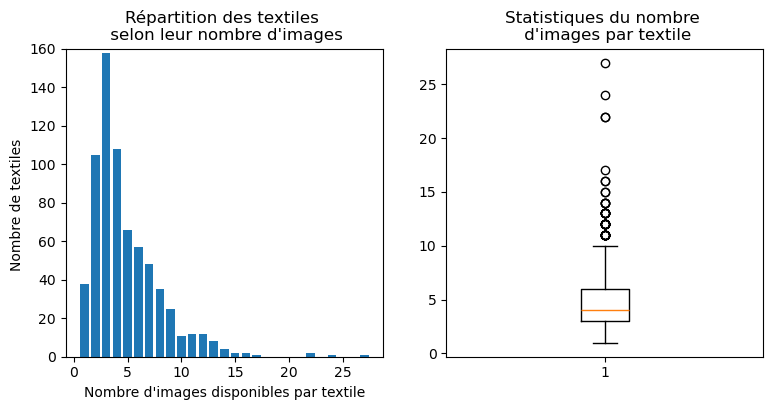

In [28]:
mean_images(df_textile)

## Dimensions des images

In [29]:
path = "images/images_jpg/"

#Récupération des dimension des images
dim = []

for elt in tqdm(df_image['image']) : 
    for image in elt : 
        if (image.endswith("_a.jpg") or image.endswith("_b.jpg") or image.endswith("_c.jpg"))==False :
            try :
                im = cv2.imread(f'{path}{image}')
                h, l, p = im.shape
                dim.append((h,l)) #On récupère uniquement hauteur/largeur, toutes les images on 3 canaux de couleurs (p = 3). 
            except :
                continue

print("Nombre d'images :", len(dim))

100%|█████████████████████████████████████████| 696/696 [01:03<00:00, 10.91it/s]

Nombre d'images : 3280


{(894, 1068): 1, (1068, 668): 1, (3729, 712): 1, (711, 1068): 289, (1068, 801): 6, (3028, 712): 1, (460, 819): 1, (2146, 712): 1, (377, 251): 1, (712, 1069): 12, (1068, 712): 1459, (1069, 712): 119, (1070, 712): 1, (1604, 1068): 1, (1068, 711): 562, (801, 1068): 1, (712, 1068): 823}


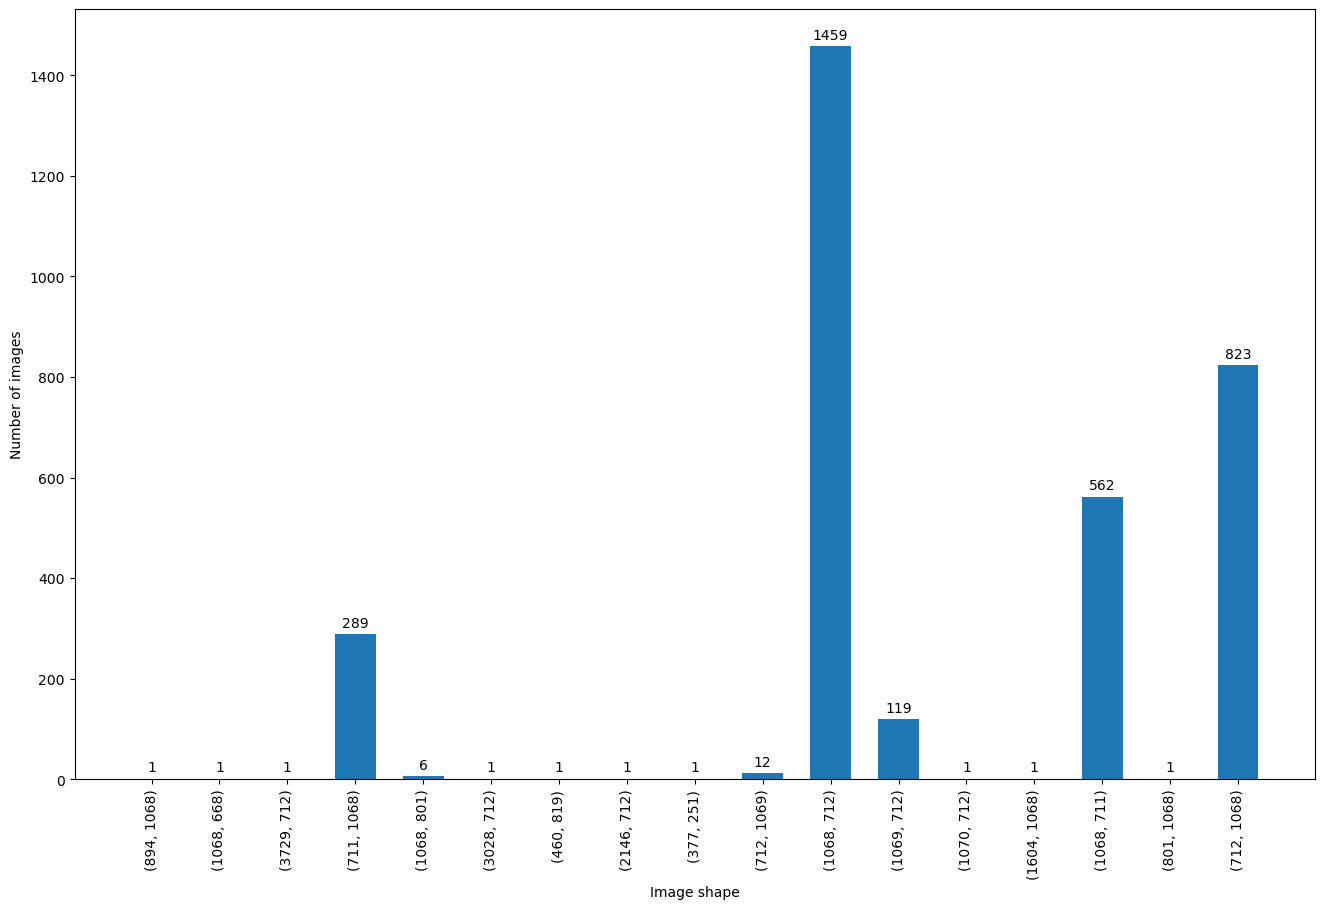

In [30]:
#Représentation graphique de la répartition des dimension des images
values = list(set(dim))

dic = {}
for elt in values : 
    dic[elt] = dim.count(elt)
print(dic)


fig, ax = plt.subplots(figsize=(16,10))
rects = plt.bar(range(len(dic)), list(dic.values()), align='center', width=0.6, label=list(dic.keys()))
ax.bar_label(rects, padding=3)

ax.tick_params(axis='x', labelrotation=90)
plt.xticks(range(len(dic)), list(dic.keys()))

ax.set(ylabel="Number of images", xlabel="Image shape")


plt.show()


## Résolution des images

In [31]:
path = "images/images_jpg/"

#Récupération de la résolution des images
res = []

for elt in tqdm(df_image['image']) : 
    for image in elt : 
        try :
            with Image.open(f'{path}{image}') as image :
                xres, yres = image.info['dpi']
                res.append((xres,yres))
        except : 
            continue


print(set(res))

100%|████████████████████████████████████████| 696/696 [00:01<00:00, 381.49it/s]

{(72, 72), (96, 96), (240, 240)}


{(72, 72): 3220, (96, 96): 2, (240, 240): 55}


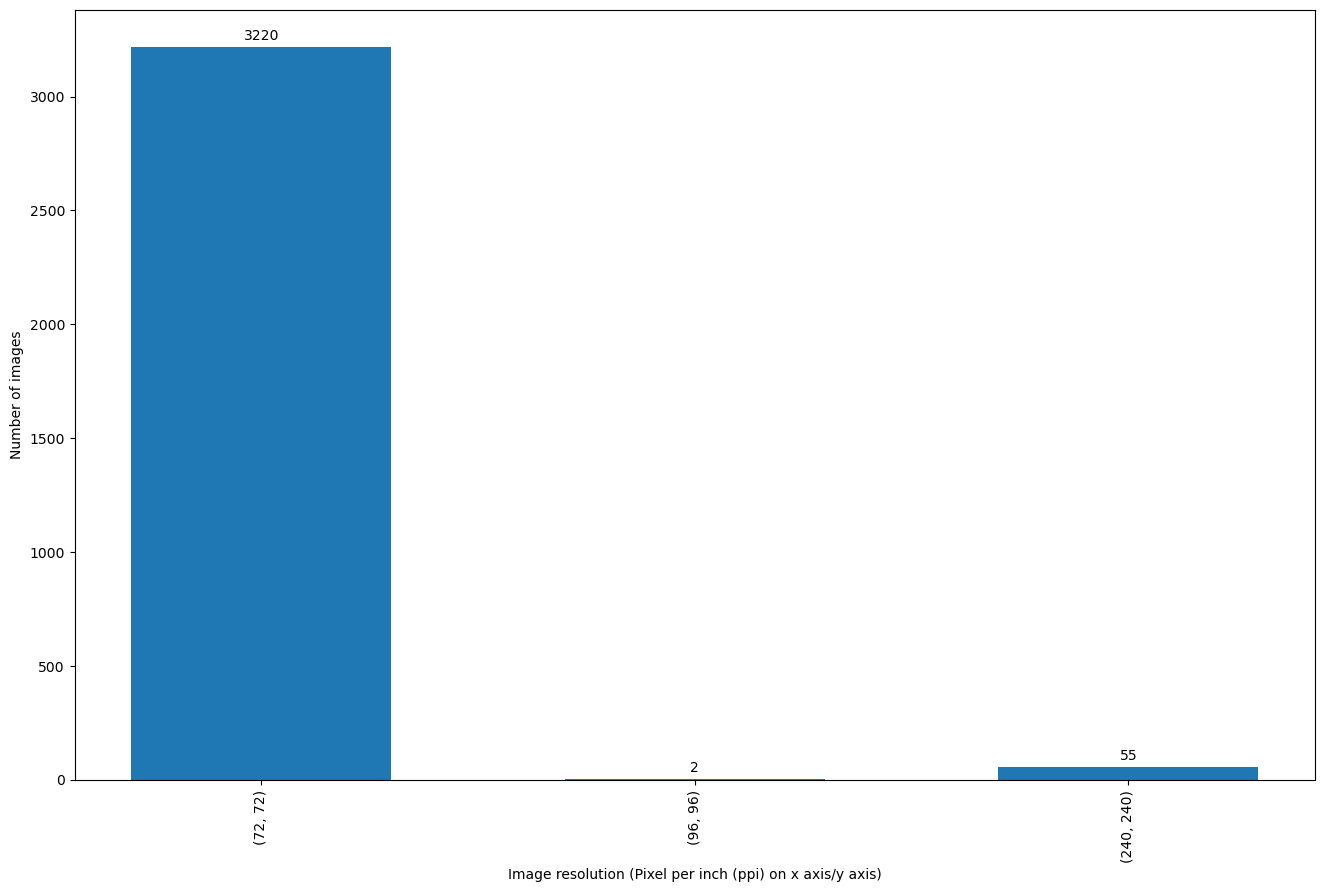

In [32]:
#Représentation graphique de la répartition de la résolution des images
values = list(set(res))

dic = {}
for elt in values : 
    dic[elt] = res.count(elt)
print(dic)


fig, ax = plt.subplots(figsize=(16,10))
rects = plt.bar(range(len(dic)), list(dic.values()), align='center', width=0.6, label=list(dic.keys()))
ax.bar_label(rects, padding=3)

ax.tick_params(axis='x', labelrotation=90)
plt.xticks(range(len(dic)), list(dic.keys()))

ax.set(ylabel="Number of images", xlabel="Image resolution (Pixel per inch (ppi) on x axis/y axis)")


plt.show()


Principalement dpi de 72/72 soit 72 pixels en largeur et hauteur d'image --> un pixel = 0.01389x0.01389 inch (1/72e).
Conversion en centimètres : 28,35 points par centimètres.